In [2]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()  # 당뇨병 데이터 사용

In [3]:
diabetes 
'''
- data => (442,10) 크기의 ndarray, 입력값
- target => (442, ) 크기의 ndarray, 타깃
- feature_names => data의 각 열의 특징 이름
- frame => (442,11)크기의 데이터 프레임(호출할 때 인자로 받은 as_frame=True일 때만 접근 가능)
- DESCR => 데이터셋의 설명
- data_filename => data의 위치경로
- target_filename => target의 위치경로
- (data,target) => 입력값과 타깃 튜플 (return_X_y=True일 때만 접근 가능)
'''

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df_x=diabetes['data']
df_y=diabetes['target'] #array 형식

In [13]:
import numpy as np
df_x=np.array(df_x) 
df_y=np.array(df_y) # numpy array로 변환

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=35)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) # dx_x와 dy_y 데이터를 각각 train 데이터와 test 데이터로 분리

(353, 10) (353,)
(89, 10) (89,)


In [38]:
w=np.random.rand(10)
b=np.random.rand() # 입력 데이터 개수에 맞는 가중치 W와 b를 준비(랜덤 값)

In [39]:
def model(X,w,b):
    predictions=0
    for i in range(10):
        predictions += X[:,i]*w[i]
    predictions += b
    return predictions # 모델 함수 구현

In [40]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse # MSE 정의

In [41]:
def loss(X,w,b,y):
    predictions = model(X,w,b)
    L = MSE(predictions,y)
    return L    # 손실 함수 정의

In [42]:
def gradient(X, w, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, w, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db # 기울기를 계산하는 gradient 함수 계산

In [43]:
LEARNING_RATE = 0.01 # 학습률을 0.01로 설정

In [45]:
losses = []
for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE*dw
    b -= LEARNING_RATE*db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L)) # 모델 학습하기, 하지만 Loss 값이 약 5309로 상당히 크다 -> 학습률을 높이자

Iteration 100 : Loss 5253.3963
Iteration 200 : Loss 5198.6109
Iteration 300 : Loss 5145.4665
Iteration 400 : Loss 5093.9083
Iteration 500 : Loss 5043.8836
Iteration 600 : Loss 4995.3411
Iteration 700 : Loss 4948.2317
Iteration 800 : Loss 4902.5078
Iteration 900 : Loss 4858.1234
Iteration 1000 : Loss 4815.0342


In [46]:
LEARNING_RATE=0.1 # 학습률을 10배 높임

In [47]:
losses = []
for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE*dw
    b -= LEARNING_RATE*db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L)) # 학습률이 0.01일때, Loss 값이 약 3289로 아직 상당히 높다 -> 학습률 높이기

Iteration 100 : Loss 4446.4435
Iteration 200 : Loss 4168.5572
Iteration 300 : Loss 3956.0280
Iteration 400 : Loss 3790.9398
Iteration 500 : Loss 3660.5917
Iteration 600 : Loss 3555.9466
Iteration 700 : Loss 3470.5451
Iteration 800 : Loss 3399.7444
Iteration 900 : Loss 3340.1852
Iteration 1000 : Loss 3289.4168


In [48]:
LEARNING_RATE=1 # 학습률 10배 높임

In [49]:
losses = []
for i in range(1, 1001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE*dw
    b -= LEARNING_RATE*db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L)) # 학습률이 1일때, Loss 값이 약 2848로 목표치인 3000보다 낮아졌다 -> 성공

Iteration 100 : Loss 3020.7098
Iteration 200 : Loss 2923.8307
Iteration 300 : Loss 2883.7091
Iteration 400 : Loss 2866.0485
Iteration 500 : Loss 2857.8002
Iteration 600 : Loss 2853.6734
Iteration 700 : Loss 2851.4307
Iteration 800 : Loss 2850.0893
Iteration 900 : Loss 2849.2000
Iteration 1000 : Loss 2848.5488


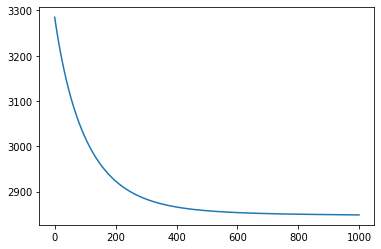

In [50]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show() # 손실 함수 그래프를 보니 1000번 학습이상부터는 크게 loss가 내려가지는 않음, 하지만 한번 2000번 학습 시켜보자

In [51]:
losses = []
for i in range(1, 2001):
    dw, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE*dw
    b -= LEARNING_RATE*db
    L = loss(X_train, w, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f'%(i, L)) # 2000번 학습시 loss값이 약 2841로 2848때보다 내려가기는 했지만 크게 내려가지는 않음.

Iteration 100 : Loss 2848.0292
Iteration 200 : Loss 2847.5856
Iteration 300 : Loss 2847.1877
Iteration 400 : Loss 2846.8184
Iteration 500 : Loss 2846.4677
Iteration 600 : Loss 2846.1296
Iteration 700 : Loss 2845.8005
Iteration 800 : Loss 2845.4780
Iteration 900 : Loss 2845.1608
Iteration 1000 : Loss 2844.8478
Iteration 1100 : Loss 2844.5385
Iteration 1200 : Loss 2844.2326
Iteration 1300 : Loss 2843.9296
Iteration 1400 : Loss 2843.6296
Iteration 1500 : Loss 2843.3322
Iteration 1600 : Loss 2843.0376
Iteration 1700 : Loss 2842.7455
Iteration 1800 : Loss 2842.4559
Iteration 1900 : Loss 2842.1688
Iteration 2000 : Loss 2841.8842


In [53]:
mse = loss(X_test,w,b,y_test)
mse # test 데이터에 대한 loss 값을 계산하여 성능 확인

3029.372785130432

'\nx축에는 X 데이터의 첫 번째 컬럼을, \ny축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화\n'

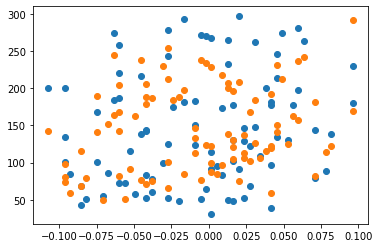

In [56]:
plt.scatter(X_test[:,0], y_test)
prediction = model(X_test, w, b)
plt.scatter(X_test[:,0], prediction)
'''
x축에는 X 데이터의 첫 번째 컬럼을, 
y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화
'''